## k-Means Clustering

example implementation of algorithm for interactive use

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def savedata(X, y, fname='nums.csv'):
    n = y.shape[0]
    y=y.reshape(n,1)
    res = np.append(X, y, axis=1)
    np.savetxt(fname,res,delimiter=",", header="x,y,label", comments="", fmt='%.5f')
def readdata(fname='nums.csv'):
    res = np.loadtxt(fname,skiprows=1,delimiter=',')
    X = res[:,:2]
    y = res[:,2]
    return X,y

In [2]:
X,y = readdata('nums_blob_3.csv')
X.shape

(200, 2)

In [3]:
# initialize centers
# take avg and randomly +- std-dev
nc = 3
xavg,xstd = X.mean(axis=0),X.std(axis=0)
centers=(np.random.random((nc,2))*2-1)*xstd+xavg
print(centers)

[[ 0.52360214 -4.18302423]
 [-0.92886863 -1.91550852]
 [ 3.58888533 -7.11362488]]


In [4]:
# helper functions
def findclosest( p, pl ):
    """ 
    find closest point in list
    args: p = 2D point, pl = list of 2D points
    return: index of closest point in pl
    """
    d = (p[0]-pl[:,0])**2 + (p[1]-pl[:,1])**2
    i = np.argmin(d)
    return i

def mean_plist( pl, centroids ):
    """ 
    determine first centroid-index list of points closest to respective centroid
    and calculate then new mean centroid for each centroid-index list of points
    args: pl = list of 2D points, centroids = list of centroid 2D points
    return: list of new centroids, index list with centroid association, loss per centroid
    """
    ilist = np.array([findclosest(v,centroids) for v in pl])
    centnew = np.array([pl[ilist==i].mean(axis=0) for i in range(len(centroids))])
    loss = np.array([((pl[ilist==i]-centnew[i])**2).sum() for i in range(len(centroids))])
    return centnew,ilist,loss

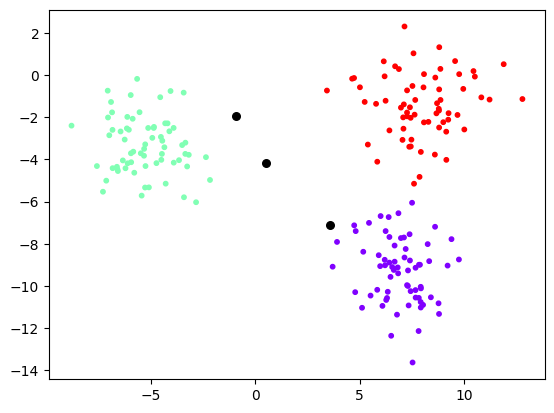

In [7]:
# plot initial positioning
plt.scatter(X[:, 0], X[:, 1],s=10, c=y,cmap='rainbow');
plt.scatter(*centers.T,s=30,color='k')

In [8]:
cnew = centers

In [15]:
# repeatedly execute until convergence
cnew,ilist,loss = mean_plist( X, cnew )
cnew,loss,loss.sum()

(array([[ 7.95320462, -1.36742415],
        [-5.24690821, -3.34627448],
        [ 6.94664412, -9.23228632]]),
 array([331.20771607, 247.51881219, 272.87125418]),
 851.5977824336636)

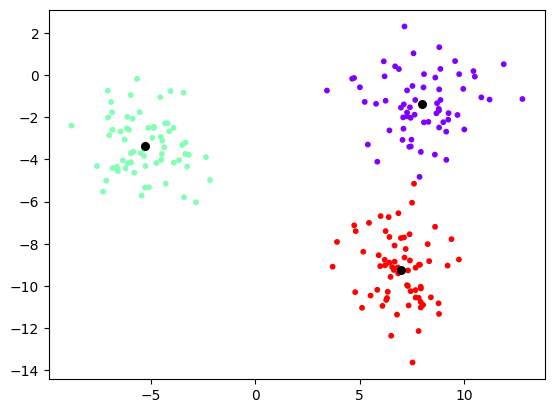

In [16]:
# plot result
plt.scatter(X[:, 0], X[:, 1],s=10, c=ilist,cmap='rainbow');
plt.scatter(*cnew.T,s=30,color='k')

---

## k-Means from sklearn

In [17]:
from sklearn.cluster import KMeans

In [18]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [19]:
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=30) #predicts 0,1,2
kmeans.fit(X)
yb_kmeans = kmeans.predict(X)
centersb = kmeans.cluster_centers_ # the resulting centers
inertia = kmeans.inertia_  # the loss

In [20]:
centersb

array([[ 6.93699433, -9.29320761],
       [-5.24690821, -3.34627448],
       [ 7.9477497 , -1.42474439]])

In [21]:
kmeans.inertia_

848.4873014389242

#### Elbow plot

In [22]:
inertias = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

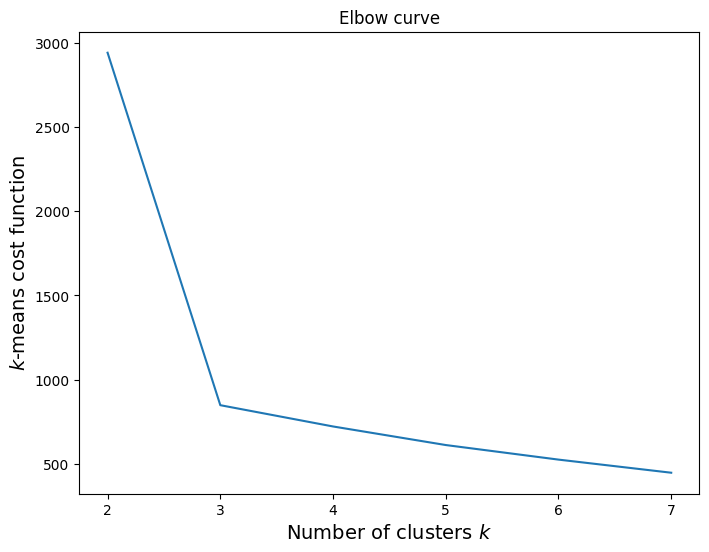

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), inertias)
plt.title('Elbow curve');
plt.xlabel('Number of clusters $k$', fontsize = 14);
plt.ylabel('$k$-means cost function', fontsize = 14);

### More complex case with overlapping blobs

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [25]:
# create 3 blobs
X1b, y1b = make_blobs(n_samples=200, centers=[(1.25,1)],
                       cluster_std=0.2, random_state=1)

X2b, y2b = make_blobs(n_samples=400, centers=[(0,1)],
                       cluster_std=0.5, random_state=2)

X3b, y3b = make_blobs(n_samples=200, centers=[(-1.25,1)],
                       cluster_std=0.2, random_state=3)

In [26]:
# combine blobs
Xb = np.vstack([X1b,X2b,X3b])
yb = np.concatenate([y1b,y2b+1,y3b+2])
Xb.shape, yb.shape

((800, 2), (800,))

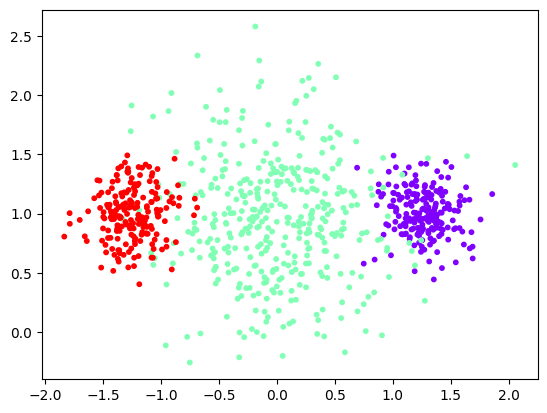

In [27]:
# plot result
plt.scatter(Xb[:, 0], Xb[:, 1],s=10, c=yb,cmap='rainbow');

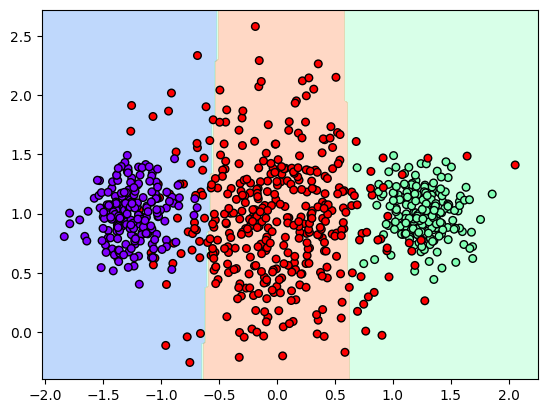

In [28]:
from mltools import visualize_classifier
nc = 3
model = KMeans(n_clusters=nc, n_init = 10, random_state=30) #predicts 0,1,2
model.fit(Xb)
# trick to get color assiciation right
clist = [ model.predict(Xb[yb==i]).mean().round() for i in range(nc)]
yc = np.array([ clist[i] for i in yb ])

# now visualize points and mode prediction
visualize_classifier(model, Xb, yc, cmap='rainbow')

#### and the elbow plot ...

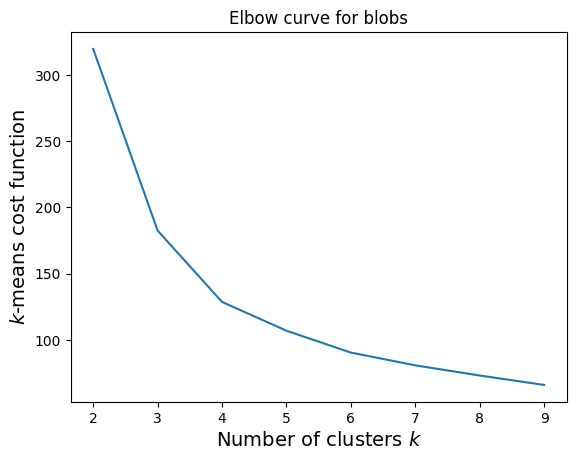

In [29]:
nmax = 10
inertiasb = []
for k in range(2, nmax):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(Xb)
    inertiasb.append(kmeans.inertia_)

plt.plot(range(2, nmax), inertiasb)
#plt.grid(True)
plt.title('Elbow curve for blobs');
plt.xlabel('Number of clusters $k$', fontsize = 14);
plt.ylabel('$k$-means cost function', fontsize = 14);


## Gaussian mixture model

In [30]:
from sklearn import mixture

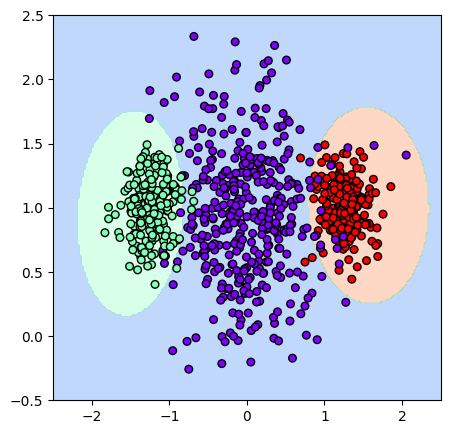

In [31]:
from mltools import visualize_classifier
nc = 3
model = mixture.GaussianMixture(n_components=3, covariance_type='full',random_state=41)
model.fit(Xb)

# trick to get color association right
clist = [ model.predict(Xb[yb==i]).mean().round() for i in range(nc)]
yc = np.array([ clist[i] for i in yb ])


# now visualize points and mode prediction
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-0.5,2.5)
visualize_classifier(model, Xb, yc, cmap='rainbow', ax=ax )


#### GMM model selection

The selection of the appropriate model is a bit more complicated for GMM
- there are various options what type of Gaussians are used
- and obviously the number of components

A tradeoff must be made between complexity of model and the loss. 
Information theory provides the Bayes Information Criterion (BIC) as a quantitative
estimator, see [**SKlearn documentation**](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#data-generation) for a detailed example and discussion. 

<div class="alert alert-block alert-success">
    <h2>Exercise 1</h2>
    Read the data from 'nums_blob_X.csv' .
    Use k-Means clustering and elbow plot to determine number of clusters
</div>    


In [32]:
X,y = readdata('nums_blob_X.csv')
X.shape

(400, 2)

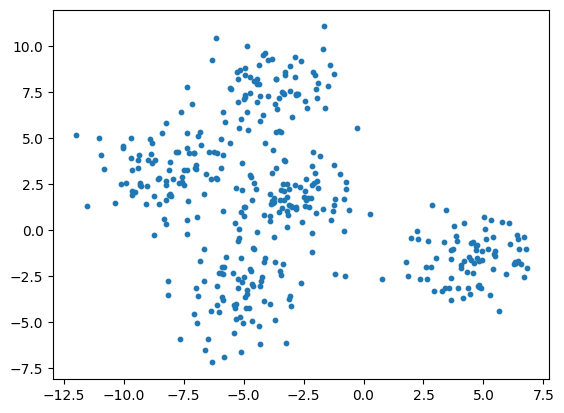

In [34]:
plt.scatter(X[:,0], X[:,1], s=10)

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

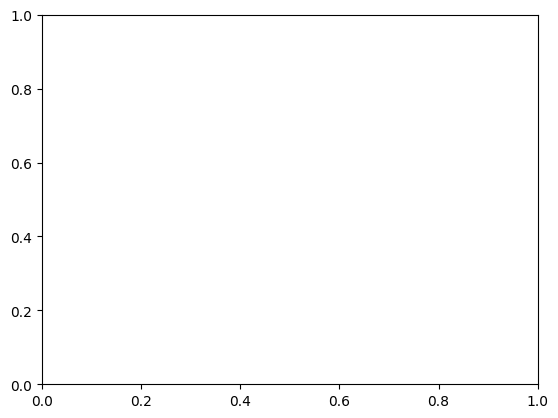

In [36]:
nmax = 10
inertiasb = []
for k in range(2, nmax):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(X)
    inertiasb.append(kmeans.inertia_)

    plt.plot(range(2, nmax), inertiasb)
    plt.grid(True)
    plt.title('Elbow curve for blobs');
    plt.xlabel('Number of clusters $k$', fontsize = 14);
    plt.ylabel('$k$-means cost function', fontsize = 14);